Import required modules.

In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### Q1. Downloading the data ###
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records". \
Download the data for January and February 2022. \
Read the data for January. How many columns are there?

In [2]:
df = pd.read_parquet('yellow_tripdata_2023-01.parquet')
print (len(df.columns))
df.head()

19


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


### Q2. Computing duration ###
Now let's compute the duration variable. It should contain the duration of a ride in minutes.\
What's the standard deviation of the trips duration in January?

In [3]:
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['duration'].std()

42.59435124195458

### Q3. Dropping outliers ###
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).\
What fraction of the records left after you dropped the outliers?

<Axes: >

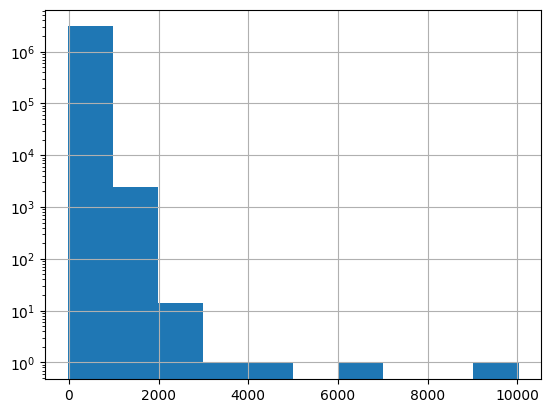

In [4]:
df['duration'].hist(log=True)

In [5]:
initial_records = len(df)
df = df[(df['duration']>=1) & (df['duration']<=60)]
remaining_records = len(df)
print (remaining_records/initial_records*100)

98.1220282212598


<Axes: >

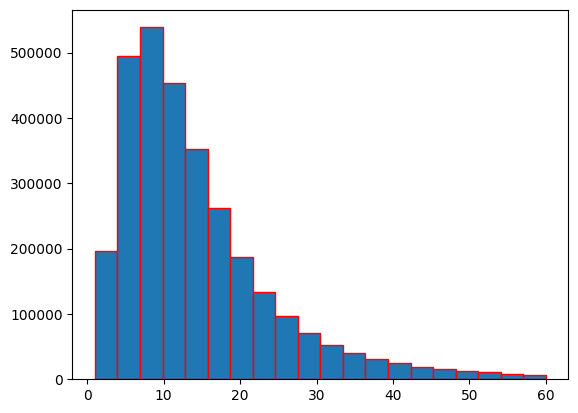

In [6]:
df['duration'].hist(bins=20, grid=False, edgecolor='r')

### Q4. One-hot encoding ###
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.
* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
* Fit a dictionary vectorizer
* Get a feature matrix from it 

What's the dimensionality of this matrix (number of columns)?

In [7]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dict = df[categorical].to_dict('records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [8]:
X_train.shape

(3009173, 515)

### Q5. Training a model ###
Now let's use the feature matrix from the previous step to train a model.
* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [9]:
y_train = df['duration'].values
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
print (rmse)

7.649261927011587


### Q6. Evaluating the model ###
Now let's apply this model to the validation dataset (February 2022). \
What's the RMSE on validation?

In [10]:
df1 = pd.read_parquet('yellow_tripdata_2023-02.parquet')
df1['duration'] = (df1['tpep_dropoff_datetime']-df1['tpep_pickup_datetime']).dt.total_seconds() / 60
df1 = df1[(df1['duration']>=1) & (df1['duration']<=60)]
categorical = ['PULocationID', 'DOLocationID']
df1[categorical] = df1[categorical].astype(str)
val_dict = df1[categorical].to_dict('records')
#dv = DictVectorizer()
X_val = dv.transform(val_dict)
y_val = df1['duration'].values
#lr = LinearRegression()
#lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)#
rmse_val = root_mean_squared_error(y_val, y_pred_val)
print (rmse_val)

7.811818828092738
